In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('penguins_raw.csv')
df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


<b>Shape of the dataframe:</b>

In [3]:
df.shape

(344, 17)

<b>Distribution of Target Labels (Species):</b>

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

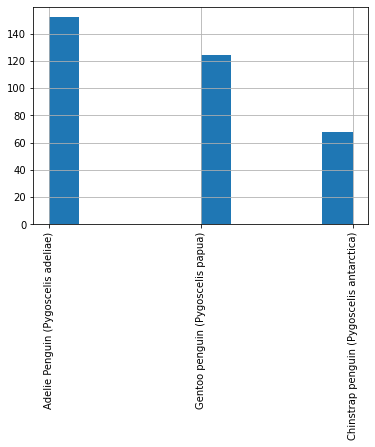

In [4]:
hist_target_label = df['Species'].hist(bins=10)
hist_target_label = df['Species'].value_counts()
plt.xticks(rotation=90)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  333 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

<b>Showing the number of null values for each columns:</b>

In [6]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

In [7]:
df['Comments']

0             Not enough blood for isotopes.
1                                        NaN
2                                        NaN
3                         Adult not sampled.
4                                        NaN
                       ...                  
339                                      NaN
340    Nest never observed with full clutch.
341    Nest never observed with full clutch.
342                                      NaN
343                                      NaN
Name: Comments, Length: 344, dtype: object

In [8]:
df.drop(['Comments'], axis=1, inplace=True)

<b>List of columns which are numerical (float, int)</b>

In [9]:
numerical_columns = [col for col in df.columns if df[col].dtype not in ['object']]
numerical_columns

['Sample Number',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

<b>List of columns which are categorical (object, string)</b>

In [10]:
categorical_columns = [col for col in df.columns if df[col].dtype in ['object']]
categorical_columns

['studyName',
 'Species',
 'Region',
 'Island',
 'Stage',
 'Individual ID',
 'Clutch Completion',
 'Date Egg',
 'Sex']

<b>Printing total number of unique values for each categorical columns:</b>

In [11]:
for item in categorical_columns:
    print(f'{item} has {len(df[item].unique())} unique values')

studyName has 3 unique values
Species has 3 unique values
Region has 1 unique values
Island has 3 unique values
Stage has 1 unique values
Individual ID has 190 unique values
Clutch Completion has 2 unique values
Date Egg has 50 unique values
Sex has 3 unique values


In [12]:
df['studyName'].unique()

array(['PAL0708', 'PAL0809', 'PAL0910'], dtype=object)

In [13]:
df['Date Egg']

0      2007-11-11
1      2007-11-11
2      2007-11-16
3      2007-11-16
4      2007-11-16
          ...    
339    2009-11-19
340    2009-11-21
341    2009-11-21
342    2009-11-21
343    2009-11-21
Name: Date Egg, Length: 344, dtype: object

In [14]:
df['Individual ID']

0        N1A1
1        N1A2
2        N2A1
3        N2A2
4        N3A1
        ...  
339     N98A2
340     N99A1
341     N99A2
342    N100A1
343    N100A2
Name: Individual ID, Length: 344, dtype: object

<b>Printing all the unique values for each categorical columns:</b>

In [15]:
for item in categorical_columns:
    print(f'-{item} has {len(df[item].unique())} unique values.')
    print(f'{df[item].unique()}')     
    print('\n')

-studyName has 3 unique values.
['PAL0708' 'PAL0809' 'PAL0910']


-Species has 3 unique values.
['Adelie Penguin (Pygoscelis adeliae)' 'Gentoo penguin (Pygoscelis papua)'
 'Chinstrap penguin (Pygoscelis antarctica)']


-Region has 1 unique values.
['Anvers']


-Island has 3 unique values.
['Torgersen' 'Biscoe' 'Dream']


-Stage has 1 unique values.
['Adult, 1 Egg Stage']


-Individual ID has 190 unique values.
['N1A1' 'N1A2' 'N2A1' 'N2A2' 'N3A1' 'N3A2' 'N4A1' 'N4A2' 'N5A1' 'N5A2'
 'N6A1' 'N6A2' 'N7A1' 'N7A2' 'N8A1' 'N8A2' 'N9A1' 'N9A2' 'N10A1' 'N10A2'
 'N11A1' 'N11A2' 'N12A1' 'N12A2' 'N13A1' 'N13A2' 'N17A1' 'N17A2' 'N18A1'
 'N18A2' 'N21A1' 'N21A2' 'N22A1' 'N22A2' 'N23A1' 'N23A2' 'N24A1' 'N24A2'
 'N25A1' 'N25A2' 'N26A1' 'N26A2' 'N27A1' 'N27A2' 'N28A1' 'N28A2' 'N29A1'
 'N29A2' 'N30A1' 'N30A2' 'N32A1' 'N32A2' 'N34A1' 'N34A2' 'N35A1' 'N35A2'
 'N36A1' 'N36A2' 'N37A1' 'N37A2' 'N38A1' 'N38A2' 'N39A1' 'N39A2' 'N40A1'
 'N40A2' 'N41A1' 'N41A2' 'N42A1' 'N42A2' 'N44A1' 'N44A2' 'N45A1' 'N45A2'
 'N4

<b>Investigating the 'Individual ID' and 'Date Egg' columns</b>

In [16]:
df['Individual ID'].describe()

count       344
unique      190
top       N36A1
freq          3
Name: Individual ID, dtype: object

In [17]:
df['Individual ID'].value_counts()

N36A1    3
N69A1    3
N22A1    3
N35A1    3
N8A1     3
        ..
N76A2    1
N98A1    1
N99A1    1
N3A2     1
N82A2    1
Name: Individual ID, Length: 190, dtype: int64

In [18]:
df['Date Egg'].describe()

count            344
unique            50
top       2007-11-27
freq              18
Name: Date Egg, dtype: object

Will drop 'Date Egg' but will keep 'Individual ID' because I am assuming that Individual ID depends on the type of penguins. Maybe the individual ID might have identifiers which may corresponding on which type of penguin it would refer to.

<b>Dropping 'Date Egg'</b>

In [19]:
df.drop('Date Egg', axis=1, inplace= True)

<b>New list of columns which are categorical (object, string)</b>

In [20]:
categorical_columns = [col for col in df.columns if df[col].dtype in ['object']]
categorical_columns

['studyName',
 'Species',
 'Region',
 'Island',
 'Stage',
 'Individual ID',
 'Clutch Completion',
 'Sex']

<b>Showing the frequency distribution of each categorical columns:</b>

'studyName' Column:

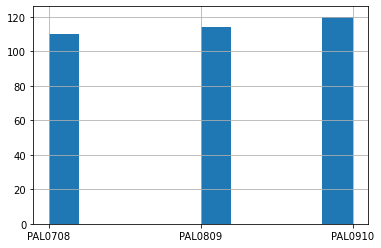

In [21]:
hist1 = df['studyName'].hist(bins=10)

'Species' Column (Target Label):

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

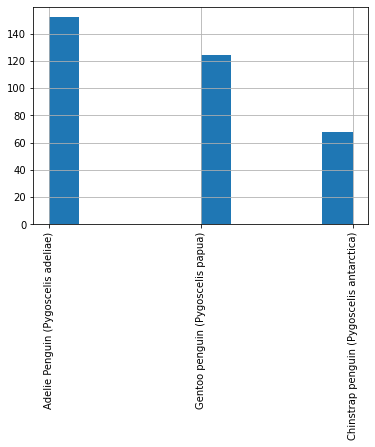

In [22]:
hist2 = df['Species'].hist(bins=10)
plt.xticks(rotation=90)

'Region' Column:

['Anvers']
344


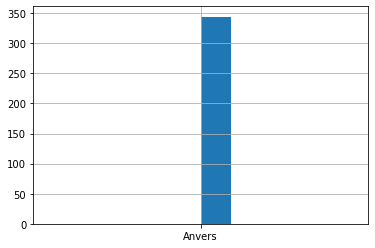

In [23]:
hist3 = df['Region'].hist(bins=10)
print(df['Region'].unique())
print(df['Region'].count())

We can see that all the penguins come from the Anvers region. Therefore this column can be dropped for the puporse of identifying the penguins.

In [24]:
df.drop('Region', axis = 1, inplace = True)

In [25]:
#New list of columns which are categorical (object, string):

categorical_columns = [col for col in df.columns if df[col].dtype in ['object']]
categorical_columns

['studyName',
 'Species',
 'Island',
 'Stage',
 'Individual ID',
 'Clutch Completion',
 'Sex']

'Island' Column:

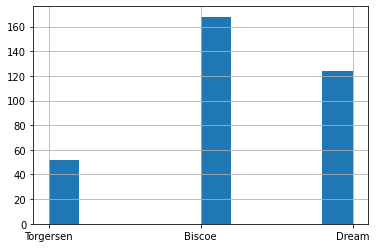

In [26]:
hist4 = df['Island'].hist(bins=10)

'Stage' Column:

array(['Adult, 1 Egg Stage'], dtype=object)

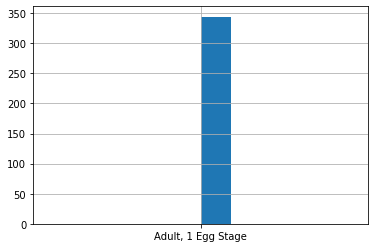

In [27]:
hist5 = df['Stage'].hist(bins=10)
df['Stage'].unique()

In [28]:
df['Stage'].value_counts()

Adult, 1 Egg Stage    344
Name: Stage, dtype: int64

We can see that only 1 penguin come from the Adult stage, while all other 344 penguins come from the Egg stage. So we may drop this column since it is a highly skwed column.

In [29]:
df.drop('Stage', axis=1, inplace=True)

In [30]:
#New list of columns which are categorical (object, string):

categorical_columns = [col for col in df.columns if df[col].dtype in ['object']]
categorical_columns

['studyName', 'Species', 'Island', 'Individual ID', 'Clutch Completion', 'Sex']

'Individual ID' Column:

In [31]:
#Here we do not show the frequency distribution in a graph because there are over 190 unique Individual IDs

df['Individual ID'].value_counts()

N36A1    3
N69A1    3
N22A1    3
N35A1    3
N8A1     3
        ..
N76A2    1
N98A1    1
N99A1    1
N3A2     1
N82A2    1
Name: Individual ID, Length: 190, dtype: int64

'Clutch Completion' Column:

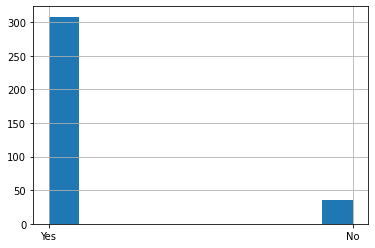

In [32]:
hist6 = df['Clutch Completion'].hist(bins=10)

'Sex' Column:

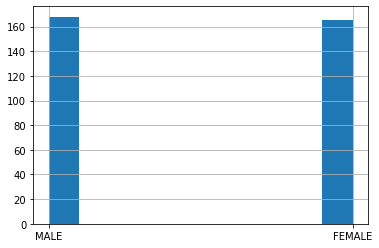

In [33]:
hist7 = df['Sex'].hist(bins=10)

<b>Working on rows with null values:</b>

In [34]:
#Checking the number of rows which have null values for each columns:

df.isnull().sum()

studyName               0
Sample Number           0
Species                 0
Island                  0
Individual ID           0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

Dropping the rows which have null values in the 'Sex' Column:

In [35]:
df.dropna(subset= ['Sex'], inplace= True)

In [36]:
#Checking the number of null values for each columns again:

df.isnull().sum()

studyName              0
Sample Number          0
Species                0
Island                 0
Individual ID          0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      9
Delta 13 C (o/oo)      8
dtype: int64

In [37]:
df['Delta 15 N (o/oo)'].describe()

count    324.000000
mean       8.739944
std        0.552073
min        7.632200
25%        8.304440
50%        8.658585
75%        9.181477
max       10.025440
Name: Delta 15 N (o/oo), dtype: float64

Standard deviation of 'Delta 15 N (o/oo)' is very small. Therefore we can replace the missing values with the mean.

In [38]:
df['Delta 15 N (o/oo)'].fillna(value=df['Delta 15 N (o/oo)'].mean(), inplace=True)

In [39]:
df['Delta 13 C (o/oo)'].describe()

count    325.000000
mean     -25.682842
std        0.796629
min      -27.018540
25%      -26.326010
50%      -25.833520
75%      -25.041690
max      -23.787670
Name: Delta 13 C (o/oo), dtype: float64

Again, Standard deviation of 'Delta 13 C (o/oo)' is very small. Therefore we can replace the missing values with the mean.

In [40]:
df['Delta 13 C (o/oo)'].fillna(value=df['Delta 13 C (o/oo)'].mean(), inplace=True)

In [41]:
#finally, our dataset does not have any missing values

df.isnull().sum()

studyName              0
Sample Number          0
Species                0
Island                 0
Individual ID          0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

<b>Encoding catagorical data</b>

We will encode the 'Individual ID' column with label encoding because it has many unique values, while other categorical columns would be encoded with one hot encoding

In [42]:
categorical_columns = [col for col in df.columns if df[col].dtype in ['object']]
categorical_columns

['studyName', 'Species', 'Island', 'Individual ID', 'Clutch Completion', 'Sex']

In [43]:
df.shape

(333, 13)

In [44]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [45]:
df['Individual ID_Label_encoded'] = enc.fit_transform(df['Individual ID'])
df['Individual ID_Label_encoded']

0       22
1       23
2       44
4       66
5       67
      ... 
339    185
340    186
341    187
342      0
343      1
Name: Individual ID_Label_encoded, Length: 333, dtype: int32

In [46]:
df.shape

(333, 14)

In [47]:
df.drop('Individual ID',axis=1, inplace=True)

In [48]:
df.shape

(333, 13)

In [49]:
df['Species_encoded'] = enc.fit_transform(df['Species'])
df['Species_encoded'].unique()

array([0, 2, 1])

In [50]:
df.shape

(333, 14)

In [51]:
df.drop('Species',axis=1, inplace=True)

In [52]:
df.shape

(333, 13)

In [53]:
categorical_columns

['studyName', 'Species', 'Island', 'Individual ID', 'Clutch Completion', 'Sex']

In [54]:
categorical_columns.remove('Individual ID')
categorical_columns.remove('Species')

In [55]:
categorical_columns

['studyName', 'Island', 'Clutch Completion', 'Sex']

DF2 is the dataset after dealing with both onehot and label encoding:

In [56]:
df_2 = pd.get_dummies(data=df, columns=categorical_columns)
df_2

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Individual ID_Label_encoded,Species_encoded,studyName_PAL0708,studyName_PAL0809,studyName_PAL0910,Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,1,39.1,18.7,181.0,3750.0,8.739944,-25.682842,22,0,1,0,0,0,0,1,0,1,0,1
1,2,39.5,17.4,186.0,3800.0,8.949560,-24.694540,23,0,1,0,0,0,0,1,0,1,1,0
2,3,40.3,18.0,195.0,3250.0,8.368210,-25.333020,44,0,1,0,0,0,0,1,0,1,1,0
4,5,36.7,19.3,193.0,3450.0,8.766510,-25.324260,66,0,1,0,0,0,0,1,0,1,1,0
5,6,39.3,20.6,190.0,3650.0,8.664960,-25.298050,67,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,64,55.8,19.8,207.0,4000.0,9.704650,-24.534940,185,1,0,0,1,0,1,0,0,1,0,1
340,65,43.5,18.1,202.0,3400.0,9.376080,-24.407530,186,1,0,0,1,0,1,0,1,0,1,0
341,66,49.6,18.2,193.0,3775.0,9.461800,-24.706150,187,1,0,0,1,0,1,0,1,0,0,1
342,67,50.8,19.0,210.0,4100.0,9.980440,-24.687410,0,1,0,0,1,0,1,0,0,1,0,1


In [59]:
#Checking the number of rows which have null values for each columns:

df_2.isnull().sum()

Sample Number                  0
Culmen Length (mm)             0
Culmen Depth (mm)              0
Flipper Length (mm)            0
Body Mass (g)                  0
Delta 15 N (o/oo)              0
Delta 13 C (o/oo)              0
Individual ID_Label_encoded    0
Species_encoded                0
studyName_PAL0708              0
studyName_PAL0809              0
studyName_PAL0910              0
Island_Biscoe                  0
Island_Dream                   0
Island_Torgersen               0
Clutch Completion_No           0
Clutch Completion_Yes          0
Sex_FEMALE                     0
Sex_MALE                       0
dtype: int64

<b>Correlation Matrix of df_2:</b>

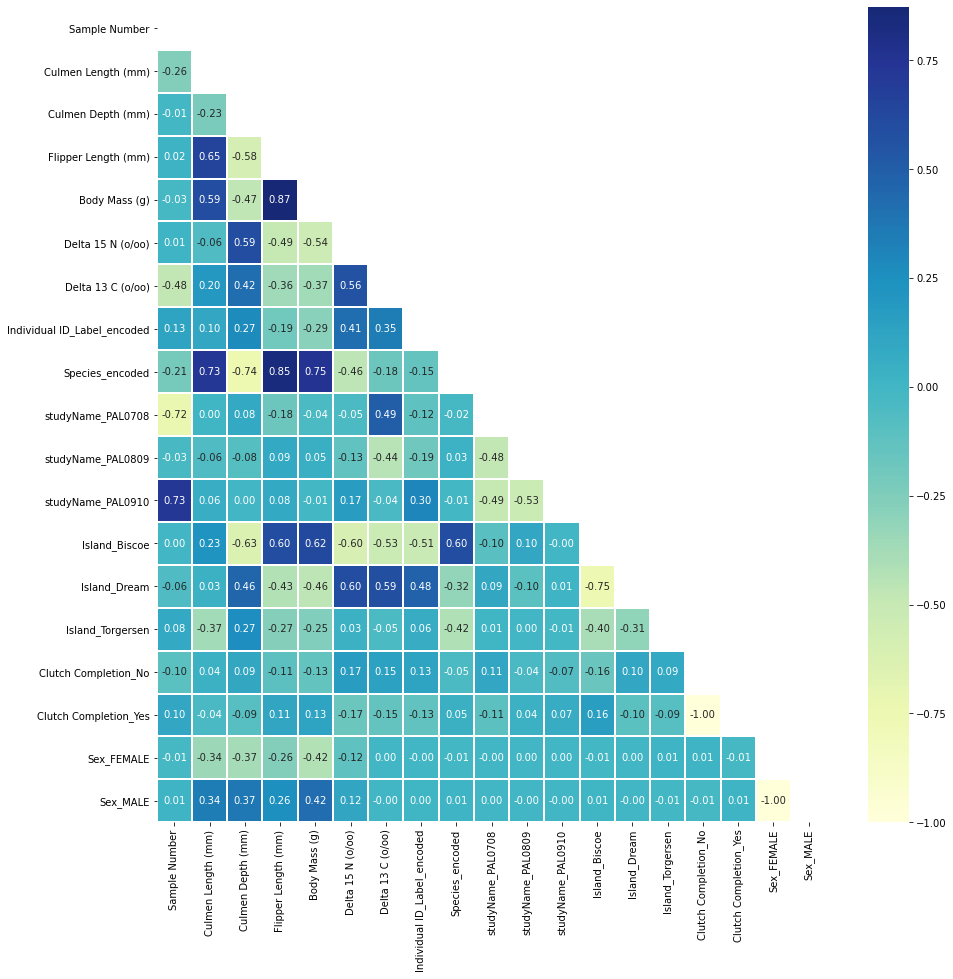

In [60]:
import seaborn as sns

corr = df_2.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,cmap='YlGnBu', mask=mask, center=0, linewidths=1, annot=True, fmt=".2f", ax=ax)
plt.show()

<b>Train Test Split:</b>

In [61]:
df_2.shape

(333, 19)

In [62]:
y = df_2['Species_encoded'].copy()
y

0      0
1      0
2      0
4      0
5      0
      ..
339    1
340    1
341    1
342    1
343    1
Name: Species_encoded, Length: 333, dtype: int32

In [63]:
X = df_2.drop('Species_encoded', axis = 1).copy()
X

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Individual ID_Label_encoded,studyName_PAL0708,studyName_PAL0809,studyName_PAL0910,Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,1,39.1,18.7,181.0,3750.0,8.739944,-25.682842,22,1,0,0,0,0,1,0,1,0,1
1,2,39.5,17.4,186.0,3800.0,8.949560,-24.694540,23,1,0,0,0,0,1,0,1,1,0
2,3,40.3,18.0,195.0,3250.0,8.368210,-25.333020,44,1,0,0,0,0,1,0,1,1,0
4,5,36.7,19.3,193.0,3450.0,8.766510,-25.324260,66,1,0,0,0,0,1,0,1,1,0
5,6,39.3,20.6,190.0,3650.0,8.664960,-25.298050,67,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,64,55.8,19.8,207.0,4000.0,9.704650,-24.534940,185,0,0,1,0,1,0,0,1,0,1
340,65,43.5,18.1,202.0,3400.0,9.376080,-24.407530,186,0,0,1,0,1,0,1,0,1,0
341,66,49.6,18.2,193.0,3775.0,9.461800,-24.706150,187,0,0,1,0,1,0,1,0,0,1
342,67,50.8,19.0,210.0,4100.0,9.980440,-24.687410,0,0,0,1,0,1,0,0,1,0,1


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
df_2_scaled = scaler.fit_transform(X)
                                   
X_train, X_test, y_train, y_test = train_test_split(df_2_scaled, y, test_size=0.25, random_state=42, stratify = y)

In [65]:
print(X_train.shape)
print(X_test.shape)

(249, 18)
(84, 18)


<b>PCA:</b>

In [66]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

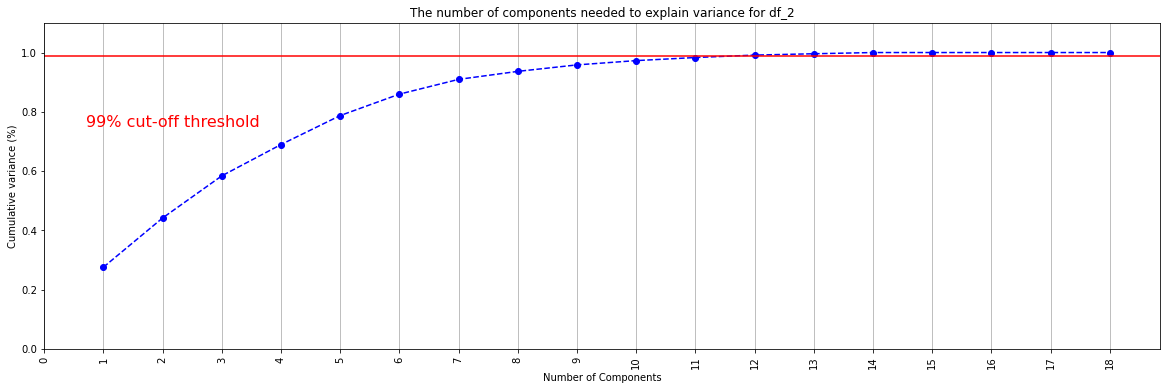

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(1, 19, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 19, step=1)) #change from 0-based array index to 1-based human-readable label
plt.xticks(rotation=90)
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance for df_2')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.7, 0.75, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [68]:
model_pca = PCA(n_components=11)

pca_X_train = model_pca.fit_transform(X_train)
pca_X_test  = model_pca.transform(X_test)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(pca_X_train.shape)
print(pca_X_test.shape)

(249, 18)
(84, 18)
(249, 11)
(84, 11)


In [70]:
pca_X_train_DataFrame = pd.DataFrame(data = pca_X_train,
                                     columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 
                                                'PC7','PC8', 'PC9', 'PC10', 'PC11',]
                                    )

pca_X_train_DataFrame

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.474057,2.017902,-0.856308,-0.765991,0.513228,2.232322,-1.044181,0.847290,0.001687,-0.408402,-0.404431
1,2.292116,2.241092,1.547195,2.699218,0.811633,-0.486031,2.019170,-1.226677,-1.324517,0.082167,0.122491
2,-3.187195,0.957811,-1.863723,0.187049,-0.221240,-0.898844,0.647866,0.437482,-0.599510,-0.624287,-0.085634
3,0.867145,-2.053997,0.356378,-0.229658,0.468386,2.171686,0.120166,-0.893626,-0.918784,-0.875180,0.252852
4,3.410149,2.189773,2.179558,2.557979,-2.492501,0.265890,-0.502692,0.222553,-0.157919,-0.895415,-0.508269
...,...,...,...,...,...,...,...,...,...,...,...
244,1.881194,0.556845,0.475102,-1.040948,2.649574,-2.302148,-1.658507,-1.244675,0.610823,-0.094931,1.009391
245,0.192433,-2.893684,-0.600434,-0.018673,-1.035120,-0.432327,1.406601,0.246797,1.419310,0.561964,-0.515182
246,-2.403342,-1.527320,-0.651586,0.192825,-2.049925,-0.658737,0.262026,0.468117,-0.355398,-0.052692,-0.244079
247,-1.760116,0.435158,2.638246,-1.075997,-1.653543,-0.656482,-0.358742,0.263354,0.110672,-0.017912,-0.273193


In [71]:
len(model_pca.explained_variance_ratio_)

11

In [72]:
variance_df = pd.DataFrame({
    'PC':['PC1','PC2','PC3','PC4', 'PC5', 'PC6','PC7','PC8', 'PC9', 'PC10', 'PC11'],
    'var':model_pca.explained_variance_ratio_   
})
variance_df

,PC,var
0,PC1,0.276063
1,PC2,0.165993
2,PC3,0.142111
3,PC4,0.105580
4,PC5,0.097728
5,PC6,0.072266
6,PC7,0.049785
7,PC8,0.026988
8,PC9,0.021837
9,PC10,0.014466


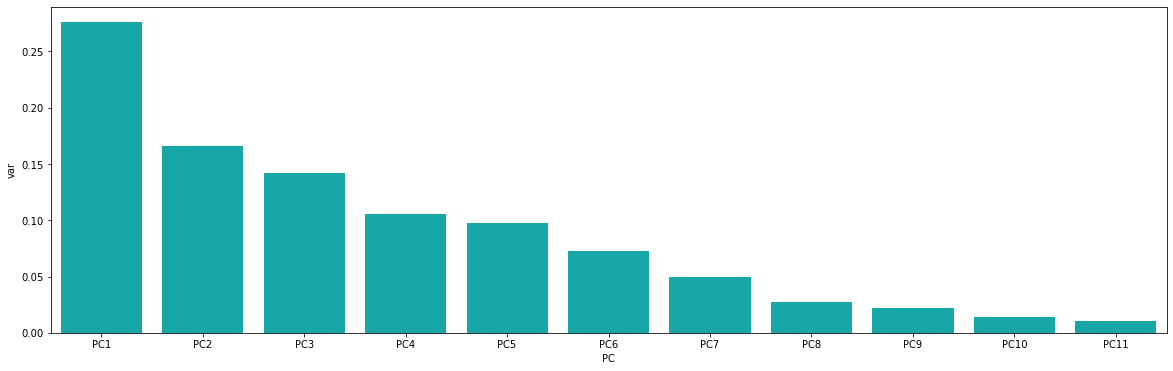

In [73]:
sns.barplot(x = variance_df['PC'],
            y = variance_df["var"], 
            data = variance_df,
            color = "c");

In [74]:
pca_X_train_DataFrame["PC1"]

0      1.474057
1      2.292116
2     -3.187195
3      0.867145
4      3.410149
         ...   
244    1.881194
245    0.192433
246   -2.403342
247   -1.760116
248    0.125977
Name: PC1, Length: 249, dtype: float64

In [75]:
selected_columns = pca_X_train_DataFrame[["PC1", "PC2"]]
new_df = selected_columns.copy()
new_df

,PC1,PC2
0,1.474057,2.017902
1,2.292116,2.241092
2,-3.187195,0.957811
3,0.867145,-2.053997
4,3.410149,2.189773
...,...,...
244,1.881194,0.556845
245,0.192433,-2.893684
246,-2.403342,-1.527320
247,-1.760116,0.435158


array([[<AxesSubplot:xlabel='PC1', ylabel='PC1'>,
        <AxesSubplot:xlabel='PC2', ylabel='PC1'>],
       [<AxesSubplot:xlabel='PC1', ylabel='PC2'>,
        <AxesSubplot:xlabel='PC2', ylabel='PC2'>]], dtype=object)

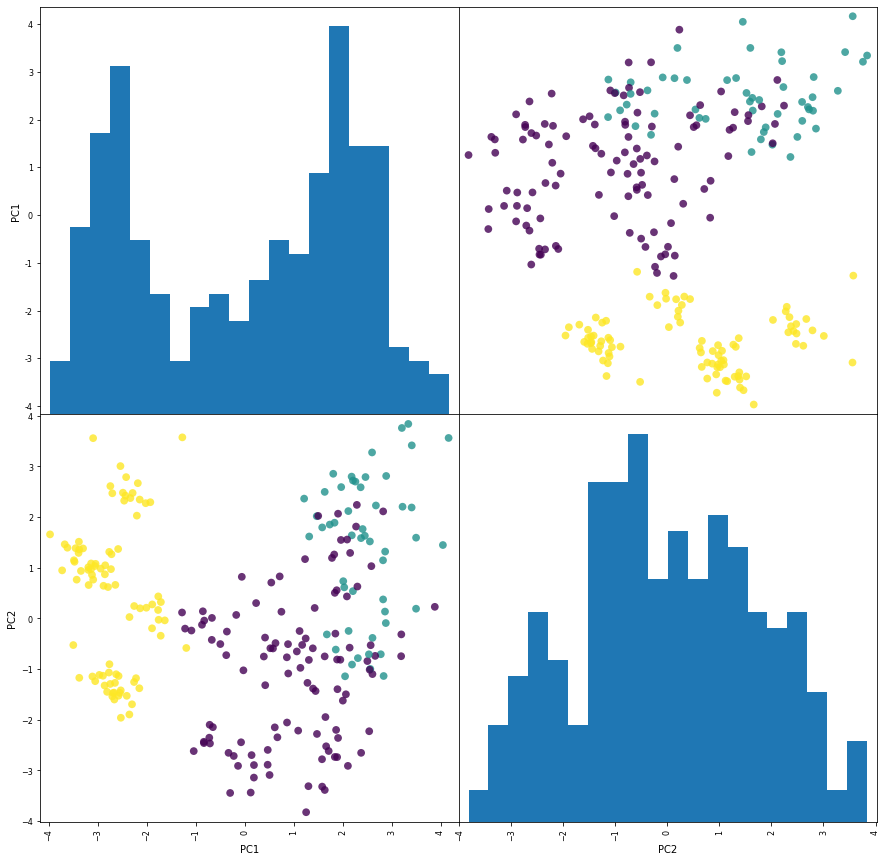

In [76]:
pd.plotting.scatter_matrix(new_df,
                           c=y_train,
                           figsize=(15,15),
                           marker='o',
                           hist_kwds = {'bins':20},
                           s=60,
                           alpha=0.8                        
                          )

<b>SVM Gridsearch:</b>

leaving rbf, using poly only:

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_1_svm = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['poly'],
              'degree' : [2,3,4]
              } 
  
grid_model_1_svm = GridSearchCV(SVC(), param_1_svm, refit = True, verbose = 3)
  
    
grid_model_1_svm.fit(pca_X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ..........C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ..........C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV 3/5] END ..........C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV 4/5] END ..........C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END ..........C=0.1, degree=2, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END ........C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV 2/5] END ........C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV 3/5] END ........C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV 4/5] END ........C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV 5/5] END ........C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV 1/5] END .......C=0.1, degree=2, gamma=0.01, kernel=poly; total time=   0.0s
[CV 2/5] END .......C=0.1, degree=2, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['poly']},
             verbose=3)

In [78]:
print(grid_model_1_svm.best_params_)
print(grid_model_1_svm.best_estimator_)

{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
SVC(C=0.1, gamma=1, kernel='poly')


In [79]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


model_1_svm = SVC(C=0.1, degree=3, gamma=1, kernel='poly')
model_1_svm.fit(pca_X_train, y_train)
  
y_pred_svm_1 = model_1_svm.predict(pca_X_test)

ac_score_svm_1 = accuracy_score(y_test, y_pred_svm_1)
rc_score_svm_1 = recall_score(y_test, y_pred_svm_1, average="weighted")
pr_score_svm_1 = precision_score(y_test, y_pred_svm_1, average="weighted")
f1_score_svm_1 = f1_score(y_test, y_pred_svm_1, average='micro')
confusion_matrix_svm_1 = confusion_matrix(y_test, y_pred_svm_1)

print("========== SVM 1 Results ==========")
print("Accuracy    : ", ac_score_svm_1)
print("Recall      : ", rc_score_svm_1)
print("Precision   : ", pr_score_svm_1)
print("F1 Score    : ", f1_score_svm_1)
print("Confusion Matrix: ")
print(confusion_matrix_svm_1)


========== SVM 1 Results ==========
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[37  0  0]
 [ 0 17  0]
 [ 0  0 30]]


leaving poly, keeping rbf

In [80]:
param_2_svm = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
  
grid_model_2_svm = GridSearchCV(SVC(), param_2_svm, refit = True, verbose = 3)
  
grid_model_2_svm.fit(pca_X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.01,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [81]:
print(grid_model_2_svm.best_params_)
print(grid_model_2_svm.best_estimator_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)


In [82]:
model_2_svm = SVC(C=1, gamma=0.01, kernel='rbf')
model_2_svm.fit(pca_X_train, y_train)
  
y_pred_svm_2 = model_2_svm.predict(pca_X_test)

ac_score_svm_2 = accuracy_score(y_test, y_pred_svm_2)
rc_score_svm_2 = recall_score(y_test, y_pred_svm_2, average="weighted")
pr_score_svm_2 = precision_score(y_test, y_pred_svm_2, average="weighted")
f1_score_svm_2 = f1_score(y_test, y_pred_svm_2, average='micro')
confusion_matrix_svm_2 = confusion_matrix(y_test, y_pred_svm_2)

print("========== SVM 2 Results ==========")
print("Accuracy    : ", ac_score_svm_2)
print("Recall      : ", rc_score_svm_2)
print("Precision   : ", pr_score_svm_2)
print("F1 Score    : ", f1_score_svm_2)
print("Confusion Matrix: ")
print(confusion_matrix_svm_2)


========== SVM 2 Results ==========
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[37  0  0]
 [ 0 17  0]
 [ 0  0 30]]


<b>KNN Gridsearch:</b>

In [83]:
from sklearn.neighbors import KNeighborsClassifier


param_knn = {'n_neighbors': list(range(1, 101))
             }
  
grid_model_knn = GridSearchCV(KNeighborsClassifier(), param_knn, refit = True, verbose = 3)
  

grid_model_knn.fit(pca_X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=1; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 2/5] END .................................

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=3)

In [84]:
print(grid_model_knn.best_params_)  
print(grid_model_knn.best_estimator_)

{'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2)


In [85]:
model_knn = KNeighborsClassifier(n_neighbors=2)

model_knn.fit(pca_X_train, y_train)

y_pred_knn = model_knn.predict(pca_X_test)

ac_score_knn = accuracy_score(y_test, y_pred_knn)
rc_score_knn = recall_score(y_test, y_pred_knn, average="weighted")
pr_score_knn = precision_score(y_test, y_pred_knn, average="weighted")
f1_score_knn = f1_score(y_test, y_pred_knn, average='micro')
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("========== KNN Results ==========")
print("Accuracy    : ", ac_score_knn)
print("Recall      : ", rc_score_knn)
print("Precision   : ", pr_score_knn)
print("F1 Score    : ", f1_score_knn)
print("Confusion Matrix: ")
print(confusion_matrix_knn)


========== KNN Results ==========
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[37  0  0]
 [ 0 17  0]
 [ 0  0 30]]


<b>Random Forest Gridsearch:</b>

In [86]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

param_rf = { 
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
}
  
grid_model_rf = GridSearchCV(rfc, param_rf, refit = True, verbose = 3)
  
grid_model_rf.fit(pca_X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .............max_features=auto, n_estimators=50; total time=   0.0s
[CV 2/5] END .............max_features=auto, n_estimators=50; total time=   0.0s
[CV 3/5] END .............max_features=auto, n_estimators=50; total time=   0.0s
[CV 4/5] END .............max_features=auto, n_estimators=50; total time=   0.0s
[CV 5/5] END .............max_features=auto, n_estimators=50; total time=   0.0s
[CV 1/5] END ............max_features=auto, n_estimators=100; total time=   0.0s
[CV 2/5] END ............max_features=auto, n_estimators=100; total time=   0.0s
[CV 3/5] END ............max_features=auto, n_estimators=100; total time=   0.0s
[CV 4/5] END ............max_features=auto, n_estimators=100; total time=   0.0s
[CV 5/5] END ............max_features=auto, n_estimators=100; total time=   0.0s
[CV 1/5] END ............max_features=auto, n_estimators=150; total time=   0.1s
[CV 2/5] END ............max_features=auto, n_es

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [87]:
print(grid_model_rf.best_params_)  
print(grid_model_rf.best_estimator_)

{'max_features': 'auto', 'n_estimators': 50}
RandomForestClassifier(n_estimators=50, random_state=42)


In [88]:
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)

model_rf.fit(pca_X_train, y_train)
 
y_pred_rf = model_rf.predict(pca_X_test)

ac_score_rf = accuracy_score(y_test, y_pred_rf)
rc_score_rf = recall_score(y_test, y_pred_rf, average="weighted")
pr_score_rf = precision_score(y_test, y_pred_rf, average="weighted")
f1_score_rf = f1_score(y_test, y_pred_rf, average='micro')
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_score_rf)
print("Recall      : ", rc_score_rf)
print("Precision   : ", pr_score_rf)
print("F1 Score    : ", f1_score_rf)
print("Confusion Matrix: ")
print(confusion_matrix_rf)


========== Random Forest Results ==========
Accuracy    :  0.9880952380952381
Recall      :  0.9880952380952381
Precision   :  0.9887566137566137
F1 Score    :  0.9880952380952381
Confusion Matrix: 
[[36  1  0]
 [ 0 17  0]
 [ 0  0 30]]
